In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import spotipy

from matplotlib import pyplot as plt

In [19]:
#read in data
data = pd.read_csv('../dat/data.csv')
data_no_duplicates = pd.read_csv('../dat/data_no_duplicates.csv')

In [20]:
# scaling data
def pre_process_data(data):
    data.drop_duplicates(subset=['track_id'], keep=False, inplace=True)
    metadata = ['artist', 'album', 'track_name', 'track_id', 'country', 'continent', 'popularity'] # features that are actually not required 
    feature_data = np.asarray(data.drop(metadata, axis = 1))
    scaled_data = StandardScaler().fit_transform(feature_data)
    return scaled_data

In [21]:
scaled_data = pre_process_data(data)
scaled_data_no_duplicates = pre_process_data(data_no_duplicates)

### Regression with chart data

In [22]:
def get_root_mean_squared_error(predictions, labels):
    rsme = 0
    for pred, label in zip(predictions, labels):
        rsme += (label - pred)**2
    return np.sqrt(1/len(predictions) * rsme)

In [23]:
X = scaled_data
y = data['popularity'].values

In [24]:
########################################## normal regression #######################################################

def print_model_performance(reg, X_train, X_test, y_train, y_test):
    predictions = reg.predict(X_train)
    print(f'prediction: {list(predictions[:5])}')
    print(f'y: {y_train[:5]}')
    rsme_normal = np.sqrt(mean_squared_error(y_train, predictions))
    print(f'train error: {rsme_normal}')

    # cross validation
    model = LinearRegression()
    scorer = make_scorer(get_root_mean_squared_error)
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    print(f'mean cross validation error: {scores.mean()}')

    # get test error
    predictions_training = reg.predict(X_test)
    print(f'test error: {np.sqrt(mean_squared_error(y_test, predictions_training))}')

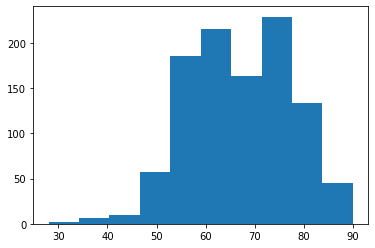

In [8]:
# look at popularity distribution
plt.hist(data['popularity']);

In [9]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.33, random_state = 42)

In [10]:
# plot residuals
def plot_residuals(X_train, y_train, reg):
    prediction = reg.predict(X_train)
    res = y_train - prediction
    fig = plt.figure(figsize=(13,7))
    plt.subplot(221)
    plt.title('residuals against prediction')
    plt.plot(prediction, res, 'b.');
    plt.subplot(222)
    plt.hist(res, bins=50)
    plt.title('residual frequency')
    plt.subplot(223)
    plt.title('predictions')
    plt.hist(prediction, bins=50)
    plt.subplot(224)
    plt.title('y')
    plt.hist(y_train, bins=50)


**normal data set**

In [11]:
# perform linear regerssion and evaluate
reg = LinearRegression().fit(X_train, y_train)
print_model_performance(reg, X_train, X_test, y_train, y_test)

prediction: [69.37452596189219, 68.47508857143644, 68.17461479302474, 65.44855121839184, 72.49635224935558]
y: [54. 76. 74. 47. 73.]
train error: 9.903608373114572
mean cross validation error: 10.07965058530862
test error: 10.366843965523662


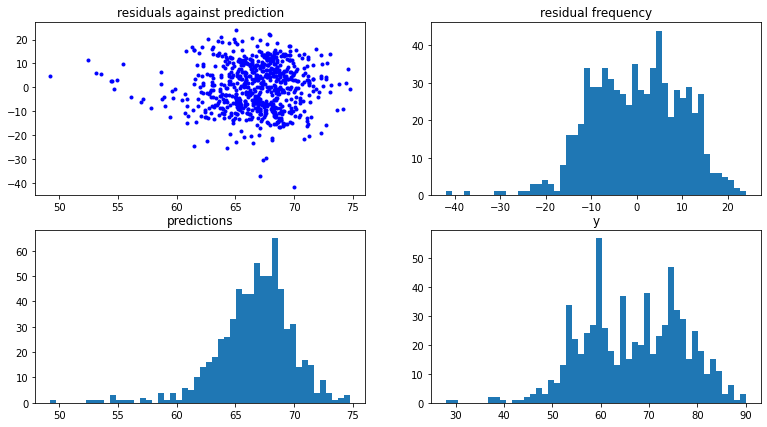

In [12]:
plot_residuals(X_train, y_train, reg)

**data with no duplictes**

In [13]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(scaled_data_no_duplicates, y, test_size = 0.33, random_state = 42)

In [14]:
# perform linear regerssion and evaluate
reg = LinearRegression().fit(X_train, y_train)
print_model_performance(reg, X_train, X_test, y_train, y_test)

prediction: [69.37452596189219, 68.47508857143644, 68.17461479302474, 65.44855121839184, 72.49635224935558]
y: [54. 76. 74. 47. 73.]
train error: 9.903608373114572
mean cross validation error: 10.140272625776687
test error: 10.366843965523662


In [ ]:
data_no_duplicates

In [36]:
data_no_duplicates.drop_duplicates(subset=['track_id'], keep=False, inplace=True)
metadata = ['artist', 'album', 'track_name', 'track_id', 'country', 'continent', 'popularity'] # features that are actually not required 
feature_data = data_no_duplicates.drop(metadata, axis = 1)
col = feature_data.columns
print(col)
scaled_data = StandardScaler().fit_transform(np.asarray(feature_data))
scaled_data = pd.DataFrame(scaled_data, columns=col)
scaled_data

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.774066,-0.308476,1.568275,-1.511572,-1.086853,1.297558,-0.156520,1.273989,1.657225,0.175326,-0.253094,0.140776
1,0.812864,1.410348,1.285856,0.855421,-1.086853,-0.590556,-0.160711,-0.776603,1.144408,-0.517805,-0.337724,0.140776
2,1.297078,0.411170,0.156180,-0.577504,0.920087,-0.261453,-0.160849,-0.470126,-0.198900,0.039063,0.063601,0.140776
3,1.239262,-0.486901,1.285856,-0.610981,-1.086853,1.645468,-0.160849,0.297858,1.312321,0.698197,-0.073127,0.140776
4,0.581597,-1.105440,1.003437,-1.420703,-1.086853,1.034275,1.783009,1.905603,-0.148980,-0.240497,-0.769124,0.140776
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,-0.386832,-0.302529,1.568275,-0.505398,0.920087,-0.524735,-0.160823,-0.513191,-0.130827,1.146111,0.395565,0.140776
1043,0.032339,-0.576114,-0.126239,0.633584,0.920087,-0.602780,-0.160849,-0.254804,0.268535,0.587406,1.133067,0.140776
1044,-0.668688,-2.181936,0.438599,-1.884978,-1.086853,-0.729720,-0.160835,-0.491659,-0.298741,-0.113210,0.301033,0.140776
1045,0.675549,0.785862,1.285856,0.658601,-1.086853,-0.497467,-0.160849,-0.369642,1.484773,-0.445966,-0.468504,0.140776


In [38]:
four_feature_reg = scaled_data[['danceability', 'energy', 'valence', 'loudness']]
print(four_feature_reg)
X_train, X_test, y_train, y_test = train_test_split(four_feature_reg, y, test_size = 0.33, random_state = 42)

# perform linear regerssion and evaluate
reg = LinearRegression().fit(X_train, y_train)
print_model_performance(reg, X_train, X_test, y_train, y_test)

      danceability    energy   valence  loudness
0         1.774066 -0.308476  1.657225 -1.511572
1         0.812864  1.410348  1.144408  0.855421
2         1.297078  0.411170 -0.198900 -0.577504
3         1.239262 -0.486901  1.312321 -0.610981
4         0.581597 -1.105440 -0.148980 -1.420703
...            ...       ...       ...       ...
1042     -0.386832 -0.302529 -0.130827 -0.505398
1043      0.032339 -0.576114  0.268535  0.633584
1044     -0.668688 -2.181936 -0.298741 -1.884978
1045      0.675549  0.785862  1.484773  0.658601
1046     -0.495238 -2.485258 -1.419677 -1.058701

[1047 rows x 4 columns]
prediction: [69.4371959026363, 68.15816336360992, 68.39568483620783, 66.69383483052412, 72.17100040690904]
y: [54. 76. 74. 47. 73.]
train error: 9.958861880102415
mean cross validation error: 10.017256951426774
test error: 10.412776072836277


With linear regression, even the trainings error is high.

### Evaluate predictions with residual plot

does not look proissing, lots of outliers

#### Support vector regression

In [15]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
print_model_performance(regressor, X_train, X_test, y_train, y_test)

prediction: [67.67756127741637, 68.33269819487994, 67.32296312173307, 68.00066936463783, 72.89966373041314]
y: [54. 76. 74. 47. 73.]
train error: 9.751146239478512
mean cross validation error: 10.14602713709294
test error: 10.195296913784427


In [16]:
regressor = SVR()
scorer = make_scorer(get_root_mean_squared_error)

In [26]:
p_grid = {'kernel': ['linear', 'rbf', 'ploy']}
outer_cv = KFold(n_splits=5, shuffle=True)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=regressor, param_grid=p_grid, cv=outer_cv, scoring=scorer, verbose=5)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..................................kernel=linear; total time=   0.0s
[CV 2/5] END ..................................kernel=linear; total time=   0.0s
[CV 3/5] END ..................................kernel=linear; total time=   0.0s
[CV 4/5] END ..................................kernel=linear; total time=   0.0s
[CV 5/5] END ..................................kernel=linear; total time=   0.0s
[CV 1/5] END .....................................kernel=rbf; total time=   0.0s
[CV 2/5] END .....................................kernel=rbf; total time=   0.0s
[CV 3/5] END .....................................kernel=rbf; total time=   0.0s
[CV 4/5] END .....................................kernel=rbf; total time=   0.0s
[CV 5/5] END .....................................kernel=rbf; total time=   0.0s
[CV 1/5] END ....................................kernel=ploy; total time=   0.0s
[CV 2/5] END ....................................

/home/florian/miniconda3/envs/statistics/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/florian/miniconda3/envs/statistics/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/florian/miniconda3/envs/statistics/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/florian/miniconda3/envs/statistics/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(), param_grid={'kernel': ['linear', 'rbf', 'ploy']},
             scoring=make_scorer(get_root_mean_squared_error), verbose=5)

In [27]:
clf.best_score_

10.20023286131855

### load keggel data 

keggel data set is used to get more training data

In [28]:
keggel_spotify = pd.read_csv('../dat/tracks_features.csv', header=0)

FileNotFoundError: [Errno 2] No such file or directory: '../dat/tracks_features.csv'

In [ ]:
keggel_spotify[keggel_spotify['year'] > 2005]

In [ ]:
cid = '020f2ed496864af6ab98a08846eac5da'
secret = 'abd17ef2d04d4d3abd706ec03db71646'

client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
from tqdm import tqdm
import random

In [ ]:
def get_popularity(keggel_spotify):
    popularity = []
    for idx in tqdm(keggel_spotify.id):
        popularity.append((sp.track(idx)['popularity']))
    keggel_spotify['popularity'] = popularity
    return keggel_spotify

In [ ]:
random.seed(69)
idx = np.arange(0,len(keggel_spotify))
sample_idx = random.sample(list(idx), 1000)

In [ ]:
sample_keggel = keggel_spotify.iloc[sample_idx]
sample_keggel = get_popularity(sample_keggel)

In [ ]:
plt.hist(keggel_spotify['year'][keggel_spotify['year']>1940], bins=50);

In [ ]:
plt.hist(sample_keggel['popularity'])

In [ ]:
sample_keggel.head()
sample_keggel.to_csv('keggel_sample.csv', index=None)

## Build training data with charts and keggel songs

Older songs seem to have no popularity measure, so exclude them

In [ ]:
data_no_duplicates.drop_duplicates(subset=['track_id'], keep=False, inplace=True)
metadata = ['artist', 'album', 'track_name', 'track_id', 'country', 'continent'] # features that are actually not required 
data_no_duplicates = data_no_duplicates.drop(metadata, axis = 1)

In [ ]:
# get shared features
sample_keggel_cols = set(sample_keggel.columns)
data_no_duplicates_cols = set(data_no_duplicates.columns)
intersection =  list(data_no_duplicates_cols.intersection(sample_keggel_cols))
print(intersection)

In [ ]:
# separate features and labels
training_keggel = sample_keggel[intersection]
training_data = data_no_duplicates[intersection]
regression_data = training_data.append(training_keggel)
y = regression_data['popularity'].reset_index(drop=True)
regression_data = regression_data.drop('popularity', axis=1).reset_index(drop=True)

In [ ]:
# exclude categotial varibles from scaling
cat_features = ['key', 'mode', 'time_signature']
categorial_columns = regression_data[cat_features].astype(str).reset_index(drop=True)
regression_data = regression_data.drop(cat_features, axis=1)

In [ ]:
# scale data
scaled_regression_data = StandardScaler().fit_transform(regression_data)
scaled_regression_data = pd.DataFrame(scaled_regression_data)
scaled_regression_data.columns = regression_data.columns
# merge with categorial data
scaled_regression_data[cat_features] = categorial_columns

In [ ]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(scaled_regression_data, y, test_size = 0.33, random_state = 42)

In [ ]:
# perform linear regerssion and evaluate
reg = LinearRegression().fit(X_train, y_train)
print_model_performance(reg, X_train, X_test, y_train, y_test)
plot_residuals(X_train, y_train, reg)

prediction: [67.67756127741637, 68.33269819487994, 67.32296312173307, 68.00066936463783, 72.89966373041314]
y: [54. 76. 74. 47. 73.]
train error: 9.751146239478512
mean cross validation error: 10.176091261342766
test error: 10.195296913784427


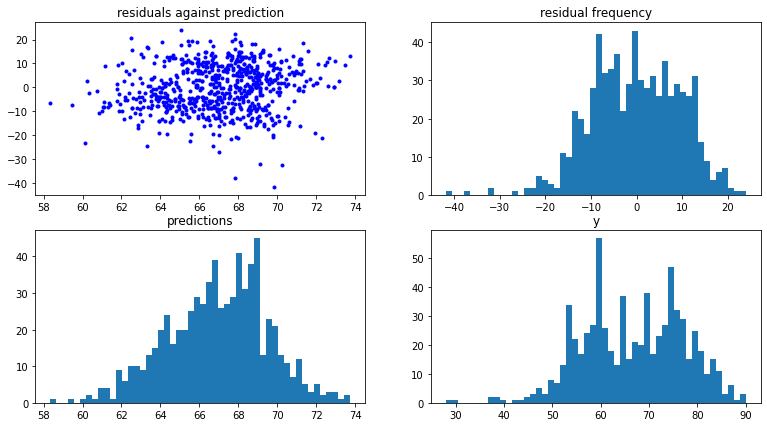

In [29]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
print_model_performance(regressor, X_train, X_test, y_train, y_test)
plot_residuals(X_train, y_train, regressor)

In [30]:
training_keggel.shape
train_keggel = scaled_regression_data.iloc[-1000:]
label_keggel = y.iloc[-1000:]

NameError: name 'training_keggel' is not defined

In [ ]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(train_keggel, label_keggel, test_size = 0.2, random_state = 42)

In [ ]:
# perform linear regerssion and evaluate
reg = LinearRegression().fit(X_train, y_train)
print_model_performance(reg, X_train, X_test, y_train, y_test)
plot_residuals(X_train, y_train, reg)
print(y_train)

## logistics regression

In [ ]:
y_logistic = np.zeros(len(y))
y_logistic[y > 50] = 1
print(y.iloc[-10:], y_logistic[-10:])

In [ ]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(scaled_regression_data, y_logistic, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print(f'prediction: {list(predictions[:5])}')
print(f'y: {y_train[:5]}')
rsme_normal = np.sqrt(mean_squared_error(y_train, predictions))
print(f'train error: {rsme_normal}')

# cross validation
model = LogisticRegression()
scorer = make_scorer(get_root_mean_squared_error)
cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
print(f'mean cross validation error: {scores.mean()}')

# get test error
predictions_training = reg.predict(X_test)
print(f'test error: {np.sqrt(mean_squared_error(y_test, predictions_training))}')

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.coef_

### log regression using only 3 params wich differ most

In [ ]:
scaled_regression_data_three_params = scaled_regression_data[['danceability', 'energy', 'valence', 'loudness']]
scaled_regression_data.shape

In [ ]:
# split data into test and trainings set
X_train, X_test, y_train, y_test = train_test_split(scaled_regression_data_three_params, y_logistic, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print(f'trainings score: {clf.score(X_train, y_train)}')
print(f'trainings score: {clf.score(X_test, y_test)}')
clf.coef_